## Regrading the popularity of Spotify Past Decades Songs (50s-10s)
### Goal
For this competition, the aim is to provide a prediction of songs using the provided information from the dataset. To provide better performance and accuracy, data visualisation and data exploration are performed to deduce the relative columns in data and which model might suit for analysis.

#### The process will break down in three part:
##### 1) Data Handle
* Import Data CSV file using Pandas
* Clean Data 
##### 2) Basic Data Analysis
* Explore data by Visualisation
##### 3) Data Analysis using model
* Supervised Machine learning Techniques
    + Linear Regressor
    + Support Vector Machine (SVM) using 3 kernels
    + Bagging with Random Forest Regressor
    + Extreme Gradient Boosting Regressor

#### Libaray Required:
* pandas
* numpy
* copy
* seaborn
* matplotlib
* xgboost

#### Data Handle
##### Import data from CSV file to dataframe

In [20]:
import pandas as pd
import numpy as np
import copy
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler,LabelEncoder,PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,GradientBoostingRegressor 
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor


In [21]:
trainData = pd.read_csv('CS98XRegressionTrain.csv')
trainData = pd.DataFrame(trainData)

testData = pd.read_csv('CS98XRegressionTest.csv')
testData = pd.DataFrame(testData)

Check the shape and information of the train and test dataframe

In [22]:
# check shape of the data
print('train data shape:',trainData.shape)
print('test data shape:',testData.shape)

# check the info of the data
print('train data info:',trainData.info())
print('test data info:',testData.info())

train data shape: (453, 15)
test data shape: (114, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   top genre  438 non-null    object
 4   year       453 non-null    int64 
 5   bpm        453 non-null    int64 
 6   nrgy       453 non-null    int64 
 7   dnce       453 non-null    int64 
 8   dB         453 non-null    int64 
 9   live       453 non-null    int64 
 10  val        453 non-null    int64 
 11  dur        453 non-null    int64 
 12  acous      453 non-null    int64 
 13  spch       453 non-null    int64 
 14  pop        453 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 53.2+ KB
train data info: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 14 columns)

Verify if duplicate row or empty cell is found in train and test

In [23]:
# check if duplicate row exist in test data and train data
print('train data duplicated:',trainData.duplicated().any())
print('test data duplicated:',testData.duplicated().any())

# check if any NaN cell in both train and test data
print('train data NaN:',trainData.columns[trainData.isnull().any()])
print('test data NaN:',testData.columns[testData.isnull().any()])

# check the number of NaN cell in both train and test data
print('train data NaN:',trainData[trainData['top genre'].isna()])

train data duplicated: False
test data duplicated: False
train data NaN: Index(['top genre'], dtype='object')
test data NaN: Index(['top genre'], dtype='object')
train data NaN:       Id                         title                            artist  \
1      2              Unchained Melody                   The Teddy Bears   
8      9           Someone Elses Roses                        Joan Regan   
26    27           Drinks On The House                Green Martini Keys   
72    73                   Pachuko Hop           Ike Carpenter Orchestra   
90    91     Little Things Means A Lot                   Jayne Mansfield   
98    99           The Lady Is A Tramp         Mel Torme & the Mel-Tones   
220  221     If I Give My Heart To You                   The Teddy Bears   
252  253  Happy Days And Lonely Nights  Suzi Miller And Johnson Brothers   
265  266              Stairway Of Love                        Terry Dene   
266  267                           You                        

Per above result, there are 15 row without top genre since there are 453 row of data in 

In [24]:
# filter out the NaN rows - in train data only, even there are empty in test data, it will be ingore as this is not related to the training
# 1) run drop if empty found
# 2) create a new dataframe that for future use
if not(trainData.columns[trainData.isnull().any()].isnull()):
    trainDataClean = trainData.drop(trainData[trainData['top genre'].isnull()].index)
else:
    trainDataClean = trainData.copy()
testDataClean = testData.copy()

# check if any NaN cell in both train and test data after removal
print('after train data NaN:',trainDataClean.columns[trainDataClean.isnull().any()])
print('after test data NaN:',testDataClean.columns[testDataClean.isnull().any()])

after train data NaN: Index(['top genre'], dtype='object')
after test data NaN: Index(['top genre'], dtype='object')


In [25]:
# encode the object columns - train data and test data,
# reason: using label encoder and not oneHotEncoder, the size of the new column will created is massive, label encoder is more suitable to turn object(string) to numerical for further analysis
encoder = LabelEncoder()
encodeCols = ["title","artist","top genre"]
for col in encodeCols:
    encoder.fit(trainDataClean[col])
    trainDataClean[col] = encoder.transform(trainDataClean[col])
    
for col in encodeCols:
    encoder.fit(testDataClean[col])
    testDataClean[col] = encoder.transform(testDataClean[col])

In [26]:
# 
print (trainDataClean.describe())


               Id       title      artist   top genre         year  \
count  453.000000  453.000000  453.000000  453.000000   453.000000   
mean   227.000000  225.536424  169.580574   34.317881  1991.443709   
std    130.914094  130.318064  100.183243   27.368439    16.776103   
min      1.000000    0.000000    0.000000    0.000000  1948.000000   
25%    114.000000  113.000000   83.000000    4.000000  1976.000000   
50%    227.000000  226.000000  171.000000   35.000000  1994.000000   
75%    340.000000  338.000000  257.000000   53.000000  2007.000000   
max    453.000000  450.000000  344.000000   86.000000  2019.000000   

              bpm        nrgy        dnce          dB        live         val  \
count  453.000000  453.000000  453.000000  453.000000  453.000000  453.000000   
mean   118.399558   60.070640   59.565121   -8.836645   17.757174   59.465784   
std     25.238713   22.205284   15.484458    3.577187   13.830300   24.539868   
min     62.000000    7.000000   18.000000  -2

In [27]:
# a brief review of encoded and remove empty cell dataframe in train data 
print("train data - after encode:\n",trainDataClean.head())

train data - after encode:
    Id  title  artist  top genre  year  bpm  nrgy  dnce  dB  live  val  dur  \
0   1    273      56          1  1996  107    31    45  -8    13   28  150   
1   2    411     306         86  2011  114    44    53  -8    13   47  139   
2   3    164      20          1  1979  105    36    63  -9    13   67  245   
3   4    436      19          1  1980  170    28    47 -16    13   33  232   
4   5    140      94         68  1973  121    47    56  -8    15   40  193   

   acous  spch  pop  
0     75     3   44  
1     49     3   37  
2     11     3   77  
3     25     3   67  
4     45     3   63  


Text(0.5, 1.0, 'Corelation of all columns')

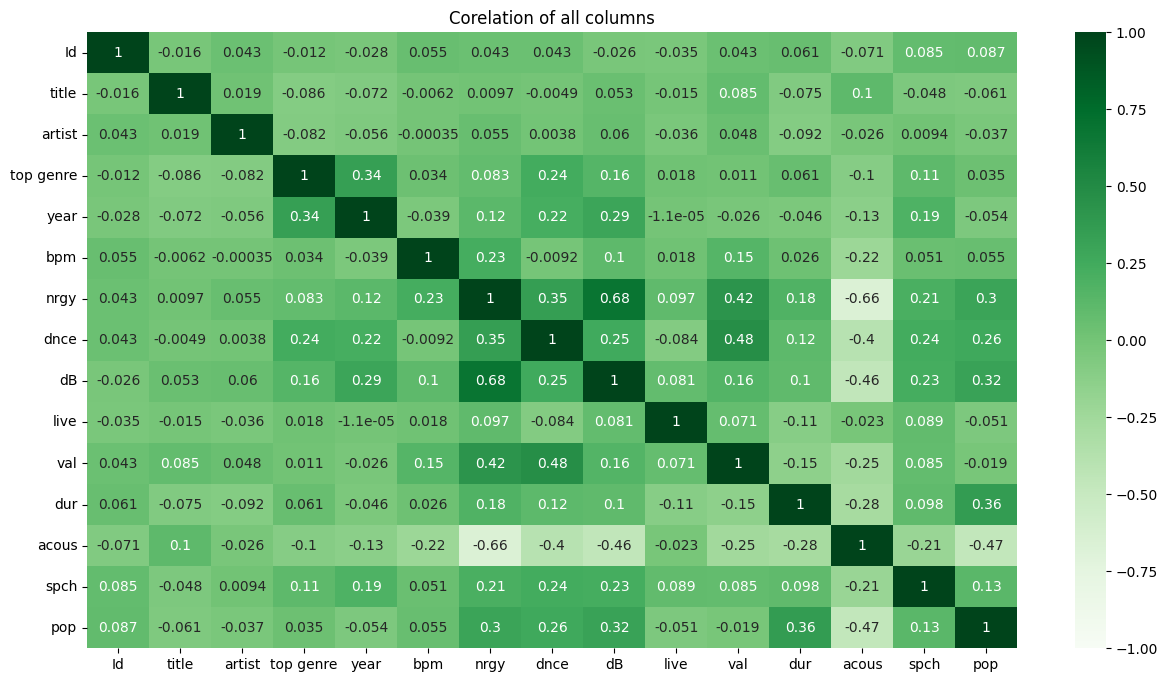

In [28]:
# corelation before remove outliner - train data
corelation = trainDataClean.corr()
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(trainDataClean.corr(), center=0, cmap='Greens',vmin=-1, vmax=1, annot=True)
ax.set_title('Corelation of all columns')

In [29]:
# filter the outliner of each columns in train data 
th = 5
outlinerList={}
outlinerCols = trainDataClean.columns
for col in outlinerCols:
    mean = np.mean(trainDataClean[col])
    std=np.std(trainDataClean[col])
    out_list=[]
    for i in trainDataClean[col]:
        z=(i-mean)/std
        if z > th:
            out_list.append(i)
    if (out_list):
        outlinerList[col]= out_list
print("outliers : ", outlinerList)

outliers :  {'live': [93], 'spch': [38, 37, 36, 47]}


In [30]:
# extract outliner in the dataframe and present the shape of dataframe before and after extraction

print("before remove outliner:",trainDataClean.shape)
for key,value in outlinerList.items():
    print(key,value)
    for i in value:
        trainDataClean.drop(trainDataClean[trainDataClean[key]==i].index, inplace = True)

print("after remove outliner:",trainDataClean.shape)

before remove outliner: (453, 15)
live [93]
spch [38, 37, 36, 47]
after remove outliner: (448, 15)


Text(0.5, 1.0, 'Corelation of all columns')

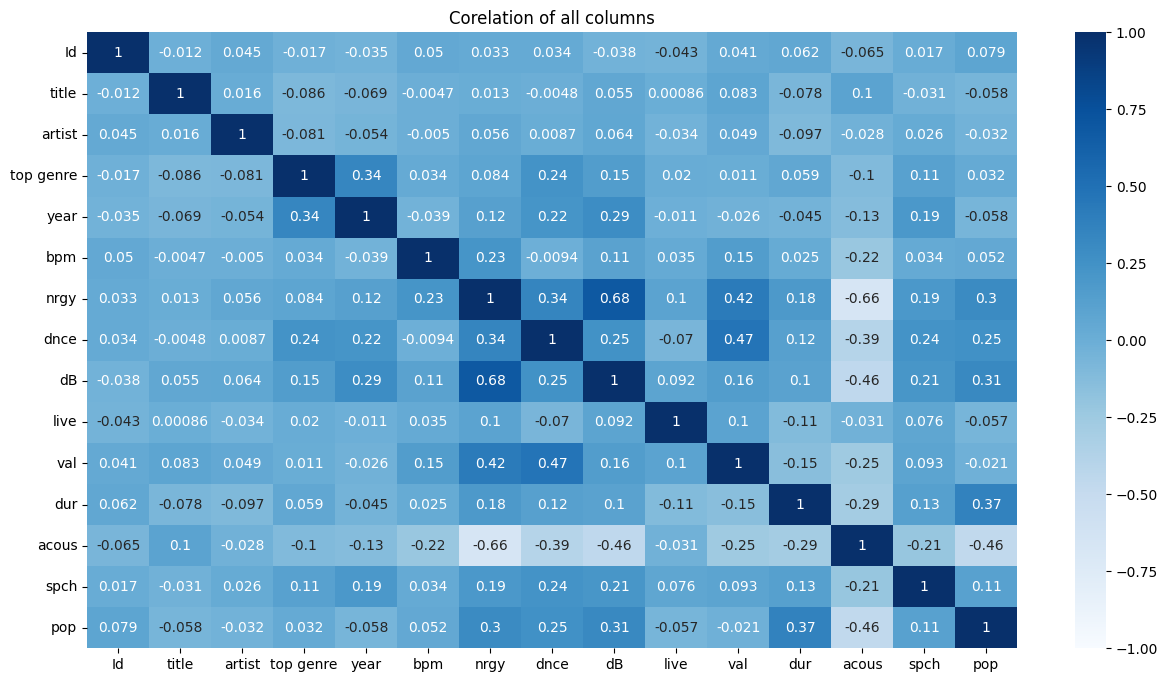

In [31]:
# corelation before remove outliner
corelation = trainDataClean.corr()
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(trainDataClean.corr(), center=0, cmap='Blues',vmin=-1, vmax=1, annot=True)
ax.set_title('Corelation of all columns')


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


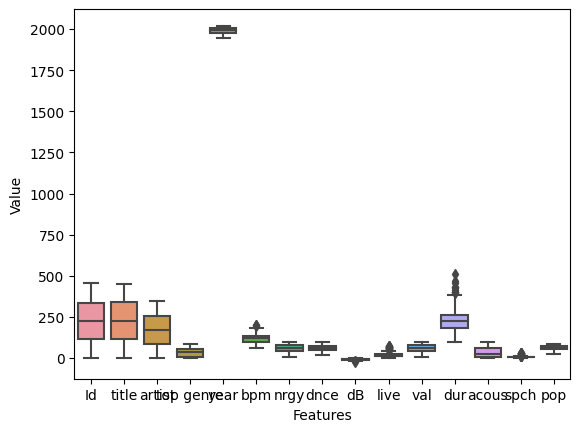

In [32]:
sns.boxplot(data=trainDataClean)
plt.xlabel('Features')
plt.ylabel('Value')
plt.show()

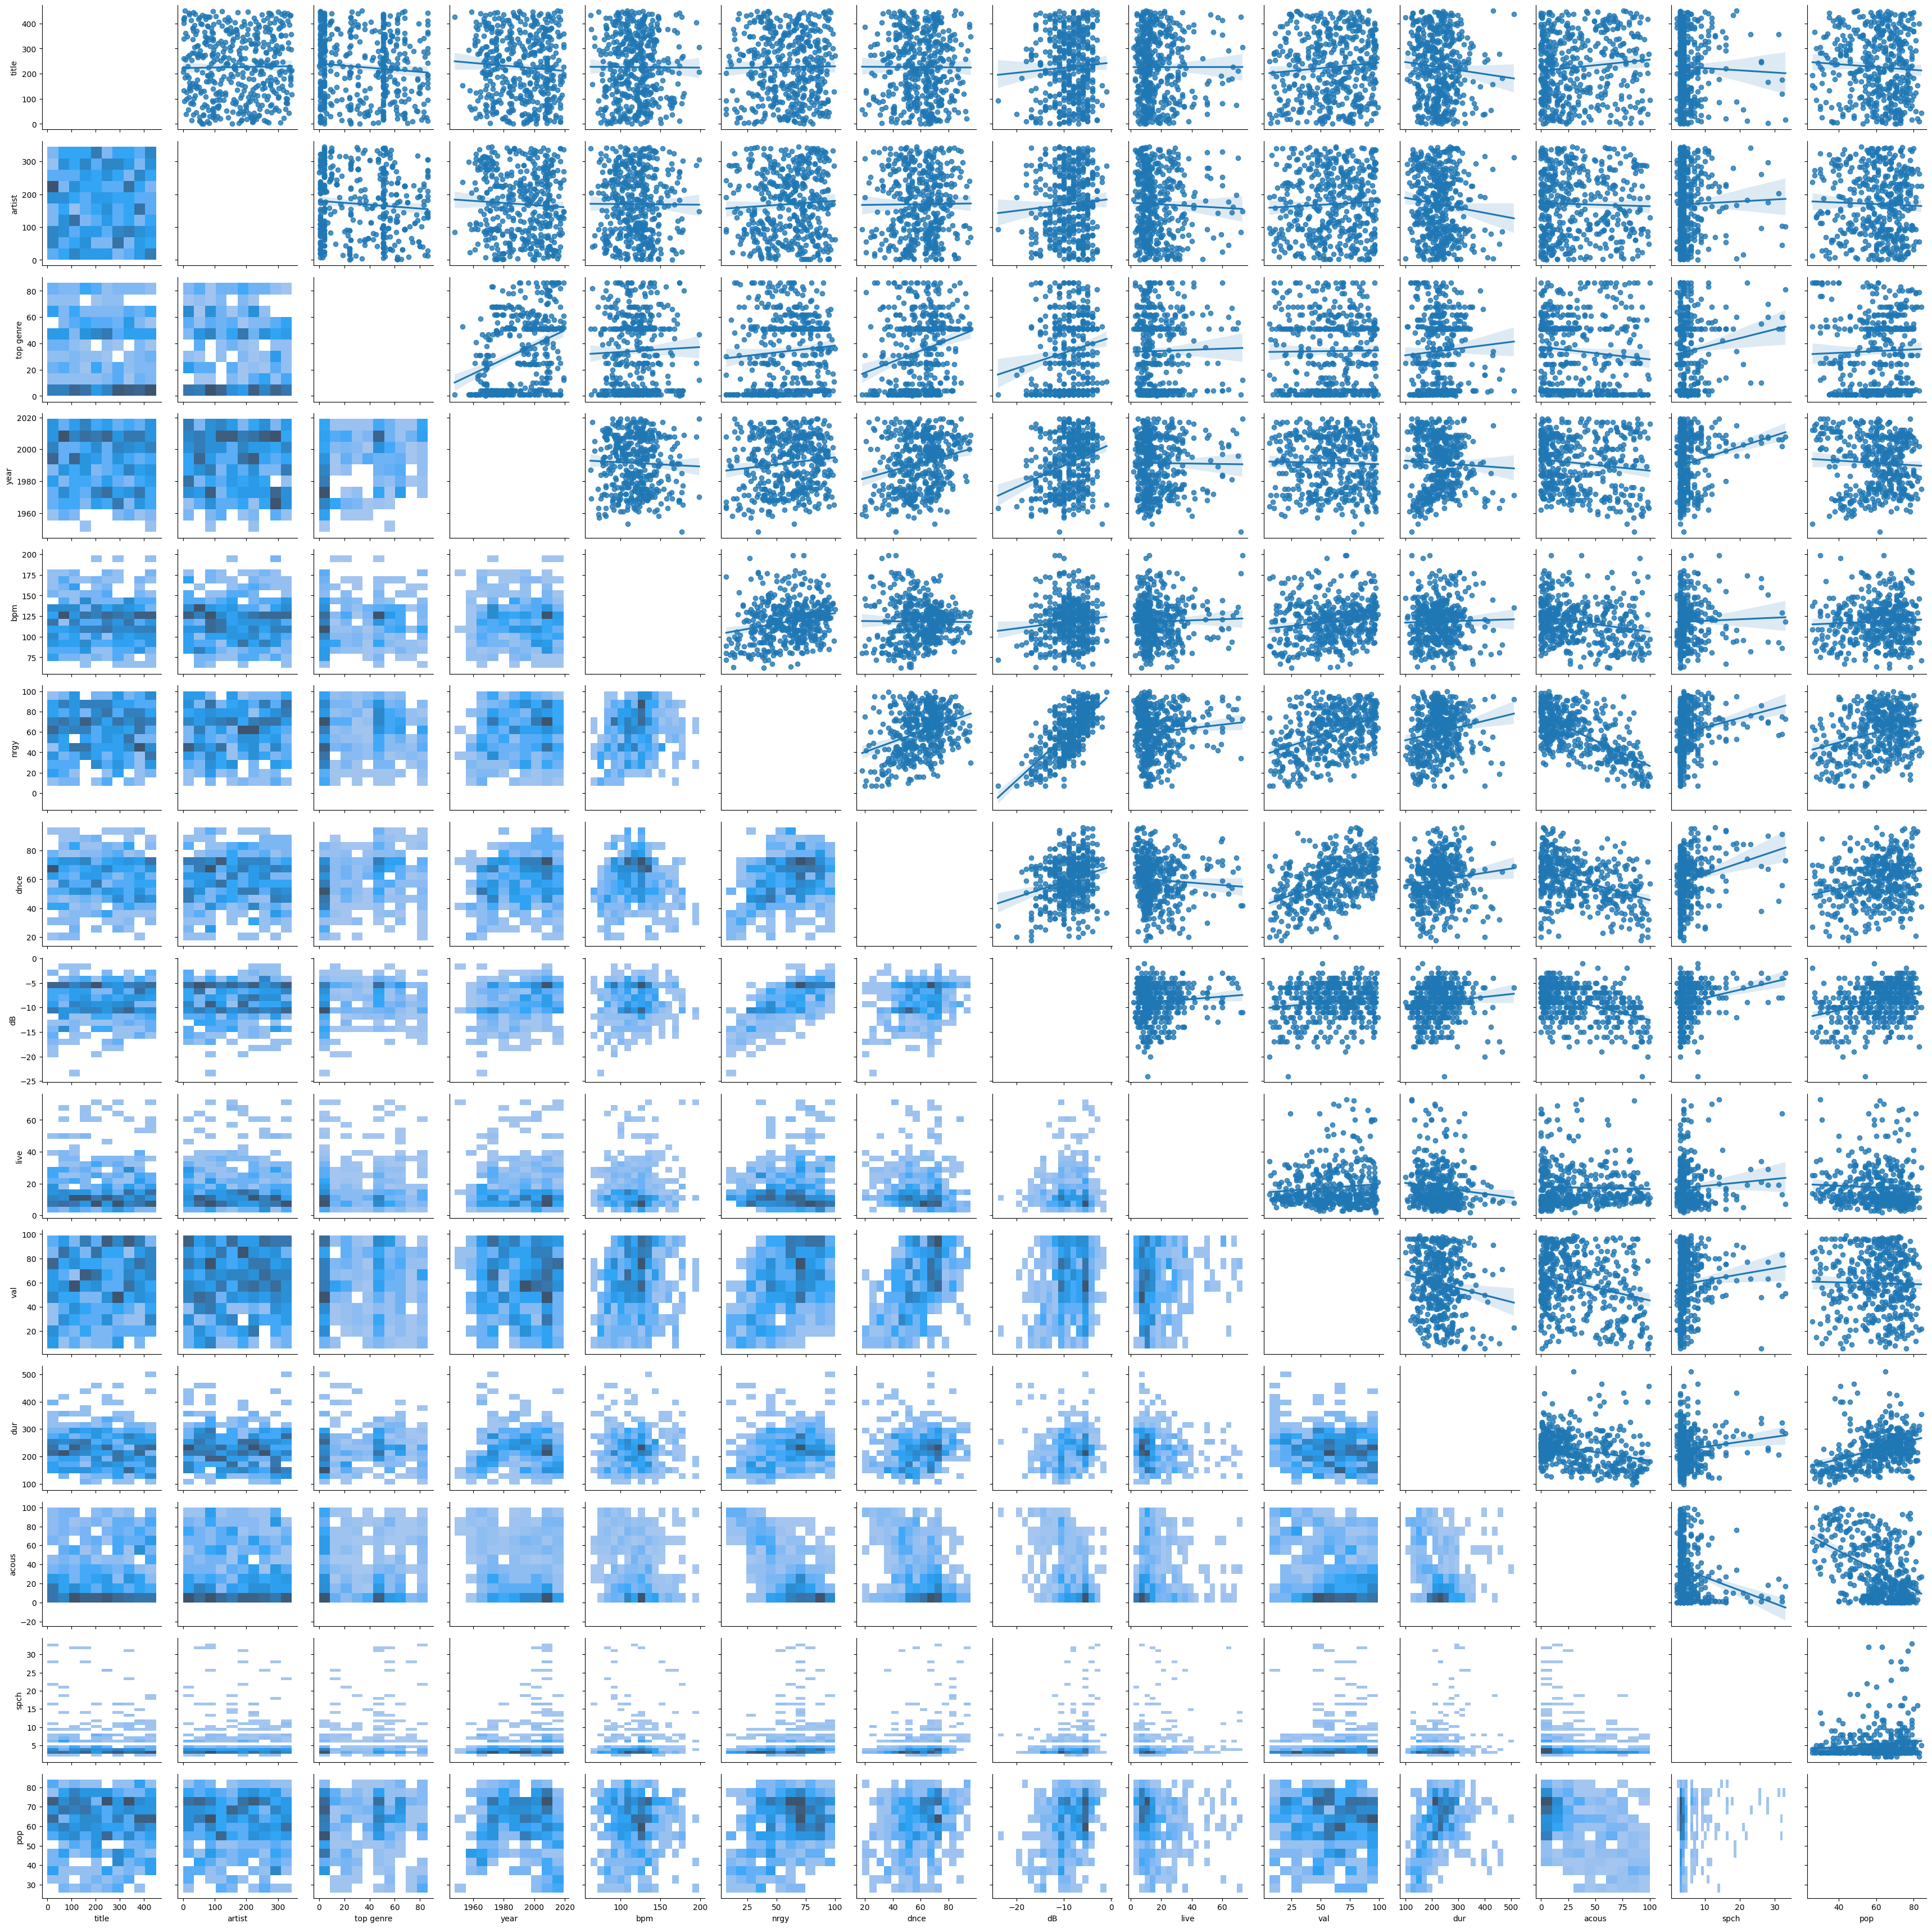

In [33]:
grid = sns.PairGrid(trainDataClean.drop(columns=["Id"]))

grid.map_upper(sns.regplot)
grid.map_lower(sns.histplot)

In [34]:
# after the extraction of outliner and empty cell
# from the corelation matrix, we can find that there are a number of columns that have a correlation over 0.1
# list as following, "top genre","nrgy","dnce","spch","dB","dur","year"
# form the pair grid, we can find there is a trend between "nrgy, db and dnce" and "dur, top genre and pop"

In [35]:
# seperated list - train data
# seperate x and y
y = trainDataClean["pop"]
x = trainDataClean[["top genre","nrgy","dnce","dB","dur","year","acous"]]
# scale the data before using 
stdScaler = StandardScaler()
xScaled = stdScaler.fit_transform(x)

# for polynomial 
polyFeat = PolynomialFeatures(degree=2, include_bias=False)
xPoly = polyFeat.fit_transform(x)
xPolyScaled = stdScaler.fit_transform(xPoly)


# for first training - scaled
xTrain, xTrainTest, yTrain, yTrainTest = train_test_split(x, y, test_size=0.25, random_state=42)

# for first training - scaled
xTrainS, xTrainSTest, yTrainS, yTrainSTest = train_test_split(xScaled, y, test_size=0.25, random_state=42)

# for first training - scaled poly
xTrainPoly, xTrainPolyTest, yTrainPoly, yTrainPolyTest = train_test_split(xPolyScaled, y, test_size=0.25, random_state=42)


In [36]:
# seperate list - test data
#xTest = testDataClean.drop(columns=["top genre","Id","artist","title","year"])
yTest = testDataClean["Id"]
xTest = testDataClean[["top genre","nrgy","dnce","dB","dur","year","acous"]]
yTestPred = testDataClean["pop"]

xScaledTest = stdScaler.fit_transform(xTest)

polyFeat = PolynomialFeatures(degree=2, include_bias=False)
xPolyScaledTest = polyFeat.fit_transform(xTest)
xPolyScaledTestScaled = stdScaler.fit_transform(xPolyScaledTest)


KeyError: 'pop'

In [ ]:
# function to write the Id and classification result to a CSV file
def toCsvFile(yPred, Id,axis,fileName):
    predTestdf = pd.DataFrame(yPred)
    result = pd.concat([Id, predTestdf], axis=1, ignore_index=True)
    result = result.set_axis(axis, axis=1)
    result.to_csv(fileName,index=False)
    print("Exported to ",fileName)


In [ ]:
# function for RMSE genreation 
def score(ytestPred,yPred,algo="this algotrithm"):
    linearMse = mean_squared_error(ytestPred, yPred)
    linearRmse = np.sqrt(linearMse)
    print("RMSE of",algo,":",linearRmse)

In [ ]:
# function to fit model and decode and call the score function
def fitModel(model,trainX,trainY,testX,algo="this algotrithm",decode=False,testY=None):
    model.fit(trainX,trainY)
    yPred = model.predict(testX)
    if decode:
        yPred = encoder.inverse_transform(yPred)
        #print(yPred)
    if testY is not None:
        score(yPred,testY,algo)
    return yPred


In [ ]:
# 1)Decision Tree Regression
# scaled x is not applied for this sample as decision tree do not require scaling
treeClf = DecisionTreeRegressor(min_samples_leaf=5) 
# train
fitModel(treeClf,xTrain, yTrain,xTrainTest,"Decision Tree Train",False,yTrainTest)

# test
yPred = fitModel(treeClf,x, y,xTest,"Decision Tree Test",False,yTestPred)
toCsvFile(yPred,yTest,['Id','pop'],"regression_Tree_Grp3.csv")


In [ ]:
# 2) poly SVR
# instead of scaled x , we use scaled polynomial featured x (degree=2)as we are going to apply poly SVR(degree=2))

rbfSVR = SVR(kernel="rbf", degree=2, C=100, epsilon=0.1, gamma="scale")
# train
fitModel(rbfSVR,xTrainPoly, yTrainPoly,xTrainPolyTest,"Poly SVR Train",False,yTrainTest)

# test
yPred = fitModel(rbfSVR,xPolyScaled,y,xPolyScaledTestScaled,"Poly SVR Test",False,yTestPred)
toCsvFile(yPred,yTest,['Id','pop'],"regression_RBF_SVC_Grp3.csv")


In [ ]:
# 4) bagging with randomForest
baggedRFReg = BaggingRegressor(base_estimator=RandomForestRegressor(max_leaf_nodes=50, n_jobs=-1),n_estimators=15, random_state=0,bootstrap=True, n_jobs=-1)

# train
fitModel(baggedRFReg,xTrainS, yTrainS,xTrainSTest,"Bagging Random Forest Train",False,yTrainSTest)

# test
yPred = fitModel(baggedRFReg,x, y,xTest,"Bagging Random Forest Test",False,yTestPred)
toCsvFile(yPred,yTest,['Id','pop'],"regression_Bagged_RF_Grp3.csv")

In [ ]:
# check the importance of each feature
rf = RandomForestRegressor(max_leaf_nodes=50, n_jobs=-1)
rf.fit(xScaled,y)
rf.feature_importances_

In [ ]:
# 5) Gradient Boosting Regressor
gradBoostReg = GradientBoostingRegressor(random_state=0)
# train
fitModel(gradBoostReg,xTrainS, yTrainS,xTrainSTest,"Gradient Boosting Train",False,yTrainSTest)

# test
yPred = fitModel(gradBoostReg,x, y,xTest,"Gradient Boosting Test",False,yTestPred)
toCsvFile(yPred,yTest,['Id','pop'],"regression_Gradient_Boost_Grp3.csv")

In [ ]:
# 4) Extreme Gradient Boosting Regressor
from xgboost import XGBRegressor

xgbReg = XGBRegressor(n_estimators=50, max_depth=7, eta=0.1, subsample=0.9, colsample_bytree=0.8)
fitModel(xgbReg,xTrainS, yTrainS,xTrainSTest,"XGBoosting Train",False,yTrainSTest)

# test
yPred = fitModel(xgbReg,x, y,xTest,"XGBoosting Test",False,yTestPred)
toCsvFile(yPred,yTest,['Id','pop'],"regression_XGB_Grp3.csv")

In [ ]:
# conclusion:
# we have tried Decision Tree (we learn from last semester), poly SVR (week 3), Bagging with Random Forest(week 4), Gradient Boosting Regressor(also week4),
# judging from the result : bagging from RF is the more suitable one